## Importing relevant modules

In [19]:
import tempfile
import subprocess
from IPython.display import Image, display

## Utility functions for visualization

In [20]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_pydot(description):
    with tempfile.NamedTemporaryFile(mode="w") as tmp1:
        tmp1.write(description)
        tmp1.flush()
        bashCommand = f"dot -Tpng {tmp1.name}"
        process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()
        display(Image(output))

# Trie

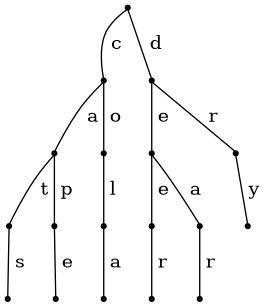

In [206]:
class Trie:
    def __init__(self):
        self.root = TrieNode("", 0)
        
    def __contains__(self, word):
        return word in self.root
    
    def build(self, words):
        for word in words:
            self.root._insert(word)
    
    def insert(self, word):
        self.root._insert(word)
    
    def delete(self, word):
        self.root._delete(word)
    
    def visualize(self):
        self.root.show()
        

class TrieNode:
    counter = 1
    
    def __init__(self, label, depth):
        self.children = {}
        self.label = label
        self.is_word = False
        self.id = TrieNode.counter
        self.depth = depth
        TrieNode.counter += 1
       
    
    def __contains__(self, word):
        node = self
        for i in range(len(word)):
            if word[i] not in node.children:
                return False
            node = node.children[word[i]]
        
        return node.is_word
        
            
    def _insert(self, word, i = 0):
        if i < len(word):
            if word[i] in self.children:
                self.children[word[i]]._insert(word, i + 1)
            else:
                self.children[word[i]] = TrieNode(word[i], i + 1)
                self.children[word[i]]._insert(word, i + 1)
        else:
            self.is_word = True
    
    
    def _delete(self, word, i = 0):
        if self.is_word and len(self.children) == 0 and i == len(word):
            return True
        
        if i >= len(word) or word[i] not in self.children:
            return False
        
        if self.children[word[i]]._delete(word, i + 1):
            if len(self.children) == 1:
                self.children = {}
                return True
            del self.children[word[i]]
            return False
                             
    
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
        
        
    def dot_edges(self):
        result = []
        for child in self.children.values():
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label=" {child.label}"];')
        return "\n".join(result)
    
    
    def all_children(self, only_leafs=False):
        if(not only_leafs or not self.children):
            result = [self]
        else:
            result = []
        for child in self.children.values():
            result += child.all_children(only_leafs=only_leafs)
        return result
    
    
    def show(self):
        nodes = self.all_children()
        TrieNode.show_graph(nodes)
    
    
    @staticmethod
    def show_graph(nodes):
        result = "digraph{\n"
        ranks = {}
        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges() + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        show_pydot(result)
        
        
trie = Trie()
trie.build(["cats", "cape", "cola", "deer", "dear", "dry"])
trie.visualize()

# Suffix Tree

In [210]:
class SuffixTree:
    def __init__(self):
        ...


class SuffixTreeNode:
    counter = 1
    
    def __init__(self, label, depth):
        self.children = {}
        self.label = label
        self.range = None
        self.id = Node.counter
        self.depth = depth
        Node.counter += 1
        
    
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
        
        
    def dot_edges(self):
        result = []
        for child in self.children.values():
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label=" {child.label}"];')
        return "\n".join(result)
    
    
    def all_children(self, only_leafs=False):
        if(not only_leafs or not self.children):
            result = [self]
        else:
            result = []
        for child in self.children.values():
            result += child.all_children(only_leafs=only_leafs)
        return result
    
    
    def show(self):
        nodes = self.all_children()
        TrieNode.show_graph(nodes)
    
    
    @staticmethod
    def show_graph(nodes):
        result = "digraph{\n"
        ranks = {}
        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges() + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        show_pydot(result)